# MT3510 Group Project - Team 5 

### Introduction to the problem

In computational mathematics, interpolation is an imperative technique that allows for new data points to be identified based on a set of 'known' data points. Two of the more advanced interpolation techniques are piecewise polynomial and spline interpolation, which this project focuses on. These interpolation techniques often provide extremely accurate estimates for these new data points, with errors between interpolated and actual data to be at machine-precision level, and the importance of these interpolation methods is reflected in their wide range of applications. Interpolation techniques allow for complicated functions to be interpreted as simpler ones to be understood and evaluated. Both of these interpolation methods will be introduced and implemented in this report, followed by a discussion of the findings when these methods are used. 

### Introduction to the methods

Due to the associated problems that arise when looking at the more straightforward interpolation techniques of linear and polynomial interpolation (such as being more susceptible to Runge's phenomenon), a natural progression to a further method of interpolation is piecewise polynomial interpolation. This interpolation method works by creating smaller sub-intervals within an interval of interpolation and approximating each sub-interval by a polynomial in a piecewise way. Piecewise polynomial interpolation builds on the methods of linear and polynomial interpolation, as it combines the piecewise way of interpolating that the linear method utilised, by considering sub-intervals and creating linear segments between them, and the polynomial method of using higher order polynomials than linear to increase levels of accuracy.

(Also need to talk about Cubic Spline either here or later on in section 4)

### Question 1

The following code is an implementation of a function which performs a piecewise Lagrange polynomial interpolation. One particular benefit to using the method of piecewise polynomial interpolation is the fact that unevenly spaced data can be handled well, as the code below demonstrates, because it does not assume that the points are evenly spaced. The function is appropriately validated using the test function $f(x)=e^xcos(10x)$ with new evaluation points being between 1 and 1.2. The piecewise polynomial interpolation is plotted, alongside the data points and the exact test function. 

The error between the piecewise polynomial interpolation and the test function is also calculated and plotted, as shown in the plot below.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def piecewise(xk, yk, xj, Ndeg):
    
    N = len(xj)
    M = len(xk)
    MM = Ndeg+1
    
    # have M - deg interpolants to obtain
    Nint = M - Ndeg
    pt1 = np.arange(MM)
    # sets of points we require:
    pts = pt1 + np.arange(Nint).reshape(Nint, 1)
    
    a = np.zeros((MM, Nint))
    for i in range(Nint):
        A = np.vander(xk[pts[i,:]])
        a[:,i] = np.linalg.solve(A, yk[pts[i,:]])
        
    pows = (Ndeg-np.arange(MM))
    y = np.empty_like(xj)
    
    # not assuming even spacing:
    # loop over new evaluation points
    for i in range(N):
        # if outside interval, set k to extrapolate
        if((xj[i]<xk).all()):
            k = 0
        elif((xj[i]>xk).all()):
            k = M-1
        # find k for xj[i], accounting for possibility that
        # xj[i] = xj[k]
        else:
            k = np.where(((xj[i]<xk[1:]) & (xj[i]>=xk[:-1])) |
                        ((xk[1:]==xj[i]) & (xj[i]>xk[:-1])))[0][0]
        
        # need polynomial with k at its centre
        j = k - Ndeg//2
     
        # account for the edges: j<0 or j>Nint-1
        j = np.maximum(0,j)
        j = np.minimum(j, Nint-1)
    
        # obtain new data point
        y[i] = np.sum(a[:,j]*xj[i]**pows)
    
    return(y)

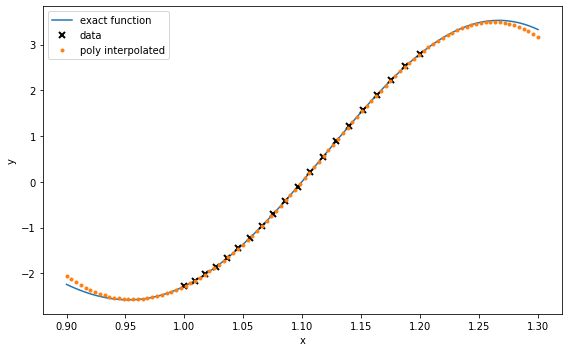

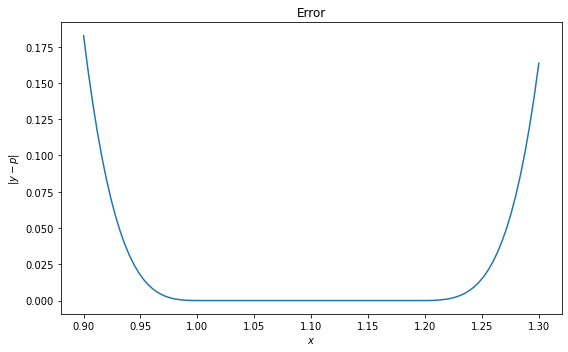

In [2]:
# testing
def f(x):
    return np.exp(x)*np.cos(10*x)

N = 20
r0 = np.linspace(0,1/6,N)

x1 = 1/(1-r0) # coordinate transformation to test uneven spacing
y1 = f(x1)

new = np.linspace(min(x1) - 0.1, max(x1) + 0.1, 100)
piece_y = piecewise(x1, y1, new, 3)

plt.figure(figsize=(8,5))
plt.plot(new, f(new), label = 'exact function')
plt.plot(x1, y1, 'kx', mew = 2, label = "data")
plt.plot(new, piece_y, '.', label = 'poly interpolated')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(new, np.abs(f(new)-piece_y))
plt.xlabel('$x$')
plt.ylabel('$|y-p|$')
plt.title('Error')
plt.tight_layout()
plt.show()

It can be seen, in these two plots, how well of an approximation the piecewise Lagrange polynomial interpolation method gives. The error at the interval between the minimum and maximum evaluation points is below machine precision, with the error only increasing at either side of the interval. This is a potential limitation of the piecewise polynomial interpolation method, with it being extremely accurate within a given interval, but less accurate outside of this interval. Error analysis and associated convergence is explored further in the next question. 

This section was completed by Sophie and Hannah. 

### Question 2

### Question 3

In [11]:
%matplotlib inline
from ipywidgets import interactive

x_possible_knots = np.array([1.5, 1.6, 1.4, 1.7, 1.3, 1.8, 1.2, 1.9, 1.1, 2, 1])
maximum_degree = len(x_possible_knots) - 1


def f(x):
    return np.exp(x)*np.cos(10*x)


def polynomial_interpolation(x_knots: np.ndarray, y_knots: np.ndarray) -> callable:

    assert len(x_knots) == len(y_knots), 'x_knots and y_knots must have the same length'

    A = np.vander(x_knots)
    coeff = np.linalg.solve(A, y_knots)
    return lambda x: np.polyval(coeff, x)


def plot(x: np.ndarray, y: np.ndarray, x_knots: np.ndarray, y_knots: np.ndarray) -> None:
    plt.figure(figsize=(16, 9))
    plt.plot(x, y, '--', label='Interpolated with degree {}'.format(len(x_knots) - 1))
    plt.plot(x, f(x), '-', label='Original function')
    plt.plot(x_knots, y_knots, 'o', label='Knots')
    plt.ylim(-7, 7)
    plt.title('Interactive plot of polynomial interpolation')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best')

    plt.show()


def interactive_plot(degree: int) -> None:
    x_knots = x_possible_knots[:degree + 1]
    y_knots = f(x_knots)
    polynomial = polynomial_interpolation(x_knots, y_knots)

    x = np.linspace(1, 2, 100)
    y = polynomial(x)
    plot(x, y, x_knots, y_knots)


interactive(interactive_plot, degree=(0, maximum_degree))

interactive(children=(IntSlider(value=5, description='degree', max=10), Output()), _dom_classes=('widget-inter…

### Question 4

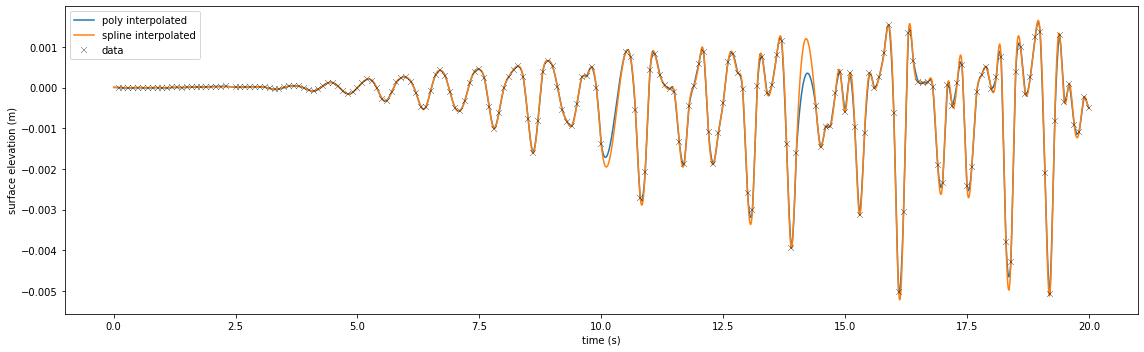

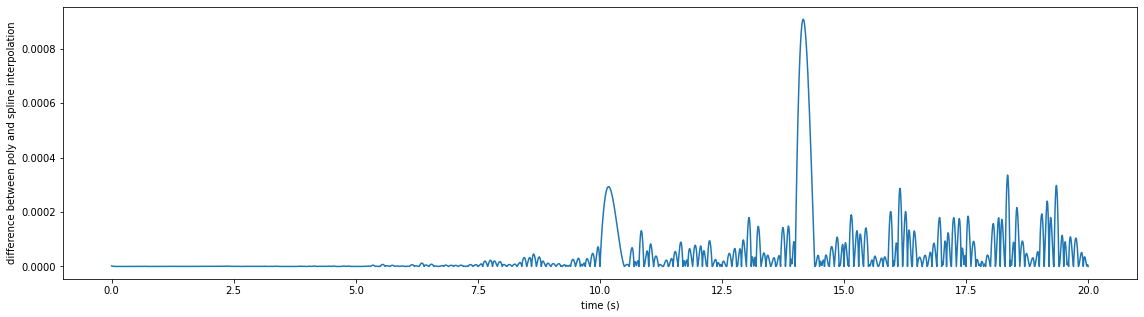

In [10]:
# This is where question 4 starts
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# load in wave data
wave = np.loadtxt('wave_data1.txt')
time = wave[0]
elev = wave[1]

# looks like readings are aimed to be taken every 0.1 seconds
# the list of times should look like such
t = [t / 10.0 for t in range(1, 301, 1)]
# therefore the number of missing data points is
number_missing = len(t) - len(time) # = 8


# new times
t_new = [t_new / 1000.0 for t_new in range(0, 20010, 10)]
# newly sampled elevations
elev_new = piecewise(time, elev, t_new, 3)

# obtain equivalent data using scipy.interpolate.CubicSpline
# for now assume that we are using a natural cubic spline - check this!
spline = CubicSpline(time, elev, bc_type = 'natural')
elev_spline = spline(t_new)

# plot the interpolations with each other + the actual wave data
plt.figure(figsize=(16,5))
plt.plot(t_new, elev_new, label = 'poly interpolated')
plt.plot(t_new, elev_spline, label = 'spline interpolated')
plt.plot(time[0:192], elev[0:192], 'kx', mew = 0.3, label = 'data')
plt.xlabel('time (s)')
plt.ylabel('surface elevation (m)')
plt.legend()
plt.tight_layout()
plt.show()

# plot the difference between the poly and spline interpolation
plt.figure(figsize = (19.25,5))
plt.plot(t_new, abs(elev_new - elev_spline))
plt.xlabel('time (s)')
plt.ylabel('difference between poly and spline interpolation')
plt.show()